In [490]:
import numpy as np
import matplotlib.pyplot as plt

In [123]:
class Fundamentalist():
    def __init__(self, a=0, b=0, c=1):
        self.a=a
        self.b=b
        self.c=c
    
    def get_expectation(self, last_price):
        return self.a + self.b * last_price
    
class Naive():
    def __init__(self, a=0, b=1, c=0):
        self.a=a
        self.b=b
        self.c=c
    
    def get_expectation(self, last_price):
        return self.a + self.b * last_price
    
class Adaptive():
    def __init__(self, a=0, b=0, c=0.5, w=0.5):
        self.a=a
        self.b=b
        self.c=c
        
        self.last_expectation = 0
        
    def get_expectation(self, last_price):
        self.last_expectation = self.last_expectation + self.w*(last_price - self.last_expectation)
        return self.last_expectation


class CobWebModel():
    def __init__(self, A=0, d=3/4, s=1, start_price=0, beta=1/2):
        self.A = A
        self.d = d
        self.s = s
        self.beta = beta
        
        self.agents = []
        self.fractions = []
        self.expectations = []
        
        self.prices = [start_price]
        
    def step(self):
        self.expectations.append(self.get_expectations())
        self.prices.append(self.get_new_price())
        self.fractions = self.get_new_fractions()
        
    
    def add_agent(self,agent, fraction):
        self.agents.append(agent)
        self.fractions.append(fraction)
        
    def get_expectations(self):
        return [agent.get_expectation(self.prices[-1]) for agent in self.agents]
        
    def get_new_price(self):
        return -1*(np.sum([self.s*self.fractions[i]*expectation for i, expectation in enumerate(self.expectations[-1])]) - self.A)/self.d
    
    def get_supply(self, expected_price):
        return self.s*expected_price
    
    def get_profit(self, expected_price, agent):
        supply = self.get_supply(expected_price)
        return supply*self.prices[-1] - 0.5*supply**2-agent.c
    
    def get_new_fractions(self):
        profits = [self.get_profit(self.expectations[-1][i], agent) for i,agent in enumerate(self.agents)]
        Z = np.sum([np.exp(self.beta*profit) for profit in profits])
        
        
        return [np.exp(self.beta*profit)/Z for profit in profits]

In [439]:
#init for naive and fundamentalist in equal starting fractions

cwmodel = CobWebModel(start_price = 20)

cwmodel.add_agent(Naive(), 0.5)
cwmodel.add_agent(Fundamentalist(), .5)

In [443]:
cwmodel.step()
print(cwmodel.fractions)
print(cwmodel.prices)

[0.6224593312018546, 0.37754066879814546]
[20, -13.333333333333334, 1.3540839905191446e-100, -1.4850962706338438e-119, 1.2325493751854812e-119]


In [ ]:
# study the limits of beta

In [401]:
def pi(expected, real, cost):
    return expected*real-0.5*expected**2-cost

def n(beta, expected, real, costs):
    ans = np.array([np.exp(beta*pi(expected[i],real,costs[i])) for i in range(len(costs))])
    return ans/np.sum(ans)

In [405]:
n(0,[5,2,3,2,0],2,[10,2,3,1,0])

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [404]:
n(10,[5,2,3,2,0],2,[10,2,3,1,0])

array([2.34533838e-59, 4.53958078e-05, 1.38866830e-11, 9.99909208e-01,
       4.53958078e-05])

In [ ]:
#Stability

In [496]:
cwmodel = CobWebModel(start_price = 20, beta=0)

cwmodel.add_agent(Naive(), 0.5)
cwmodel.add_agent(Fundamentalist(), .5)

In [497]:
for i in range(20):
    cwmodel.step()

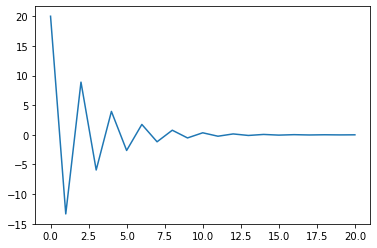

In [498]:
plt.plot(cwmodel.prices)

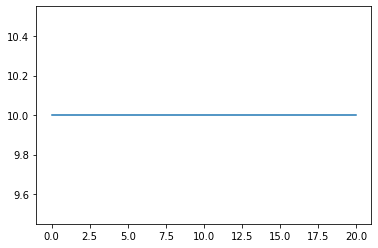

In [544]:
# check s = -b

cwmodel = CobWebModel(start_price = 10, beta=0, s=-0.75)

cwmodel.add_agent(Naive(), 1)
#cwmodel.add_agent(Fundamentalist(), 1)

for i in range(20):
    cwmodel.step()
    
plt.plot(cwmodel.prices)

In [514]:
cwmodel = CobWebModel(start_price = 20, beta=100)

cwmodel.add_agent(Naive(), 0.5)
cwmodel.add_agent(Fundamentalist(), .5)

In [515]:
for i in range(20):
    cwmodel.step()

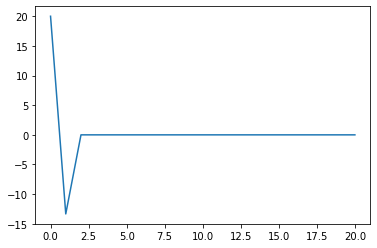

In [516]:
plt.plot(cwmodel.prices)